### Predicting Critical Temperatures of Superconductors based on their Material Properties
Superconductors are a unique class of materials that efficiently conduct electricity without electrical resistance or heat loss. These powerful properties make superconductors desirable in electric power transmission and distribution, MRIs, and particle acceleration. However, it is challenging to readily use superconductors due to the extremely low temperatures they need to reach and maintain their superconductive state. The temperature at which a material enters its superconductive state is the critical temperature.



  In this notebook, we will explore techniques and approaches for predicting the critical temperature of a material based on its different attributes. We will explore not only which features are most important in determining the critical temperature of a material but also which modeling techniques best predict the critical temperature of a material based on its material properties. These insights could help us identify materials with superconducting properties and estimate their critical temperatures.


# Outline:
- Loading data and basic exploratory data analysis
- Understanding features and feature importance
- Non nueral network modeling without dimensionality reduction
- Non nueral network modeling with dimensionality reduction (PCA)
- Nueral networks
- All performance results

Click on the first icon in the sidebar to view the table of contents and jump around the notebook.

In [ ]:
# importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.display import display, HTML

plt.style.use('ggplot')


# Loading Data and Basic EDA

In [ ]:
# reading in data
from google.colab import drive
drive.mount('/content/gdrive/')

file_path="/content/gdrive/MyDrive/Data/Superconductor Dataset/train.csv"
supercon=pd.read_csv(file_path)


Mounted at /content/gdrive/


In [ ]:
# 21263 observations (different materials) and 81 features (82nd column in the critical temperature)
supercon.shape

(21263, 82)

In [ ]:
# so that we can see all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# the first five row of the data frame
supercon.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [ ]:
# 81 features, 1 target variable (critical_temp)
supercon.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [ ]:
# checking for missing values-- there are none
(supercon.isna().sum())


number_of_elements                 0
mean_atomic_mass                   0
wtd_mean_atomic_mass               0
gmean_atomic_mass                  0
wtd_gmean_atomic_mass              0
entropy_atomic_mass                0
wtd_entropy_atomic_mass            0
range_atomic_mass                  0
wtd_range_atomic_mass              0
std_atomic_mass                    0
wtd_std_atomic_mass                0
mean_fie                           0
wtd_mean_fie                       0
gmean_fie                          0
wtd_gmean_fie                      0
entropy_fie                        0
wtd_entropy_fie                    0
range_fie                          0
wtd_range_fie                      0
std_fie                            0
wtd_std_fie                        0
mean_atomic_radius                 0
wtd_mean_atomic_radius             0
gmean_atomic_radius                0
wtd_gmean_atomic_radius            0
entropy_atomic_radius              0
wtd_entropy_atomic_radius          0
r

In [ ]:
# checking and dropping duplicates
print('Shape before dropping duplicates:',supercon.shape)
print('Duplicate observations:', supercon.duplicated().sum())
supercon=supercon.drop_duplicates()
print('Shape after dropping duplicates:',supercon.shape)

Shape before dropping duplicates: (21263, 82)
Duplicate observations: 66
Shape after dropping duplicates: (21197, 82)


In [ ]:
# ensuring that all temps are above 0 kelvin
min(supercon['critical_temp'])

0.00021

In [ ]:
fig = px.histogram(supercon, x='critical_temp', title='Distribution of Critical Temperatures', color_discrete_sequence=['red'],
                   nbins=20, height=400, width=600, range_x=[0, max(supercon['critical_temp'])])

fig.update_xaxes(title_text='Critical temperature (kelvin)')
fig.update_yaxes(title_text='Count')

fig.show(renderer="colab")



The data is right skewed. Many materials have critical temperatures between 0 and 25 Kelvin ( -459.67°F to -414.67°F). Another group of materials have critical temperatures between 65 and 95 Kelvin (-337.67°F to -297.67°F).


# Understanding Features and Feature Importance


We're working with a lot of features! If we look more closely, we can break this lengthy feature list into a more digestible one. Many of the columns are simply variations of the same concept. Here are the nine main features:
- number of elements
- atomic mass
- first ionization energy
- atomic radius
- density
- electron affinity
- fusion heat
- thermal conductivity
- valence


Let's give each of these a brief introduction:


- Number of elements: number of elements in the chemical formula of the superconductor
- Atomic mass: the mass of an individual atom of the element, accounting for the various isotopes of the element and their relative abundance
- FIE (first ionization energy): energy required to remove the outermost (most loosely held) electron from a neutral atom in its gaseous state
- Atomic radius: distance from the nucleus of an atom to the outermost orbital of its electron
- Density: the degree of compactness of a substance. How closely packed the particles (atoms, molecules, or ions) of a substance are within a given volume
- Electron affinity: the neutral atom's likelihood of gaining an electron.
- Fusion heat: amount of heat needed to change a substance from a solid state to its liquid state while maintaining constant temperature and pressure
- Thermal conductivity: the material's ability to conduct heat. how efficiently a material can transfer heat from one point to another
- Valence: the combining power of an element, measured by the number of hydrogen atoms an element can displace or combine with.


We are interested in examining the relationships between the features, specifically the relationship between each feature and the  critical temperature. We can explore these relationships using correlation coefficients, which quantify the strength of a linear relationship between two variables, ranging from -1 to 1. It's important to note that we make a strong and sometimes incorrect assumption that the relationship between two variables is linear, although this might not be the case. For the sake of visualization, we will focus on plotting the features with correlation coefficient magnitudes greater than 0.5 with the critical temperatures. This approach will make the data more digestible compared to plotting all 81 features.







In [ ]:
# selecting only the features that have greater than 0.5 correlation magnitude with the target variable.
relevant_features= abs(supercon.corr()['critical_temp'])[abs(supercon.corr()['critical_temp'])>0.5]
relevant_features

# converting the relevant features to a list
selected_columns = relevant_features.index.tolist()
selected_columns


['number_of_elements',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'entropy_fie',
 'range_fie',
 'std_fie',
 'wtd_std_fie',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'range_ThermalConductivity',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'mean_Valence',
 'wtd_mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'critical_temp']

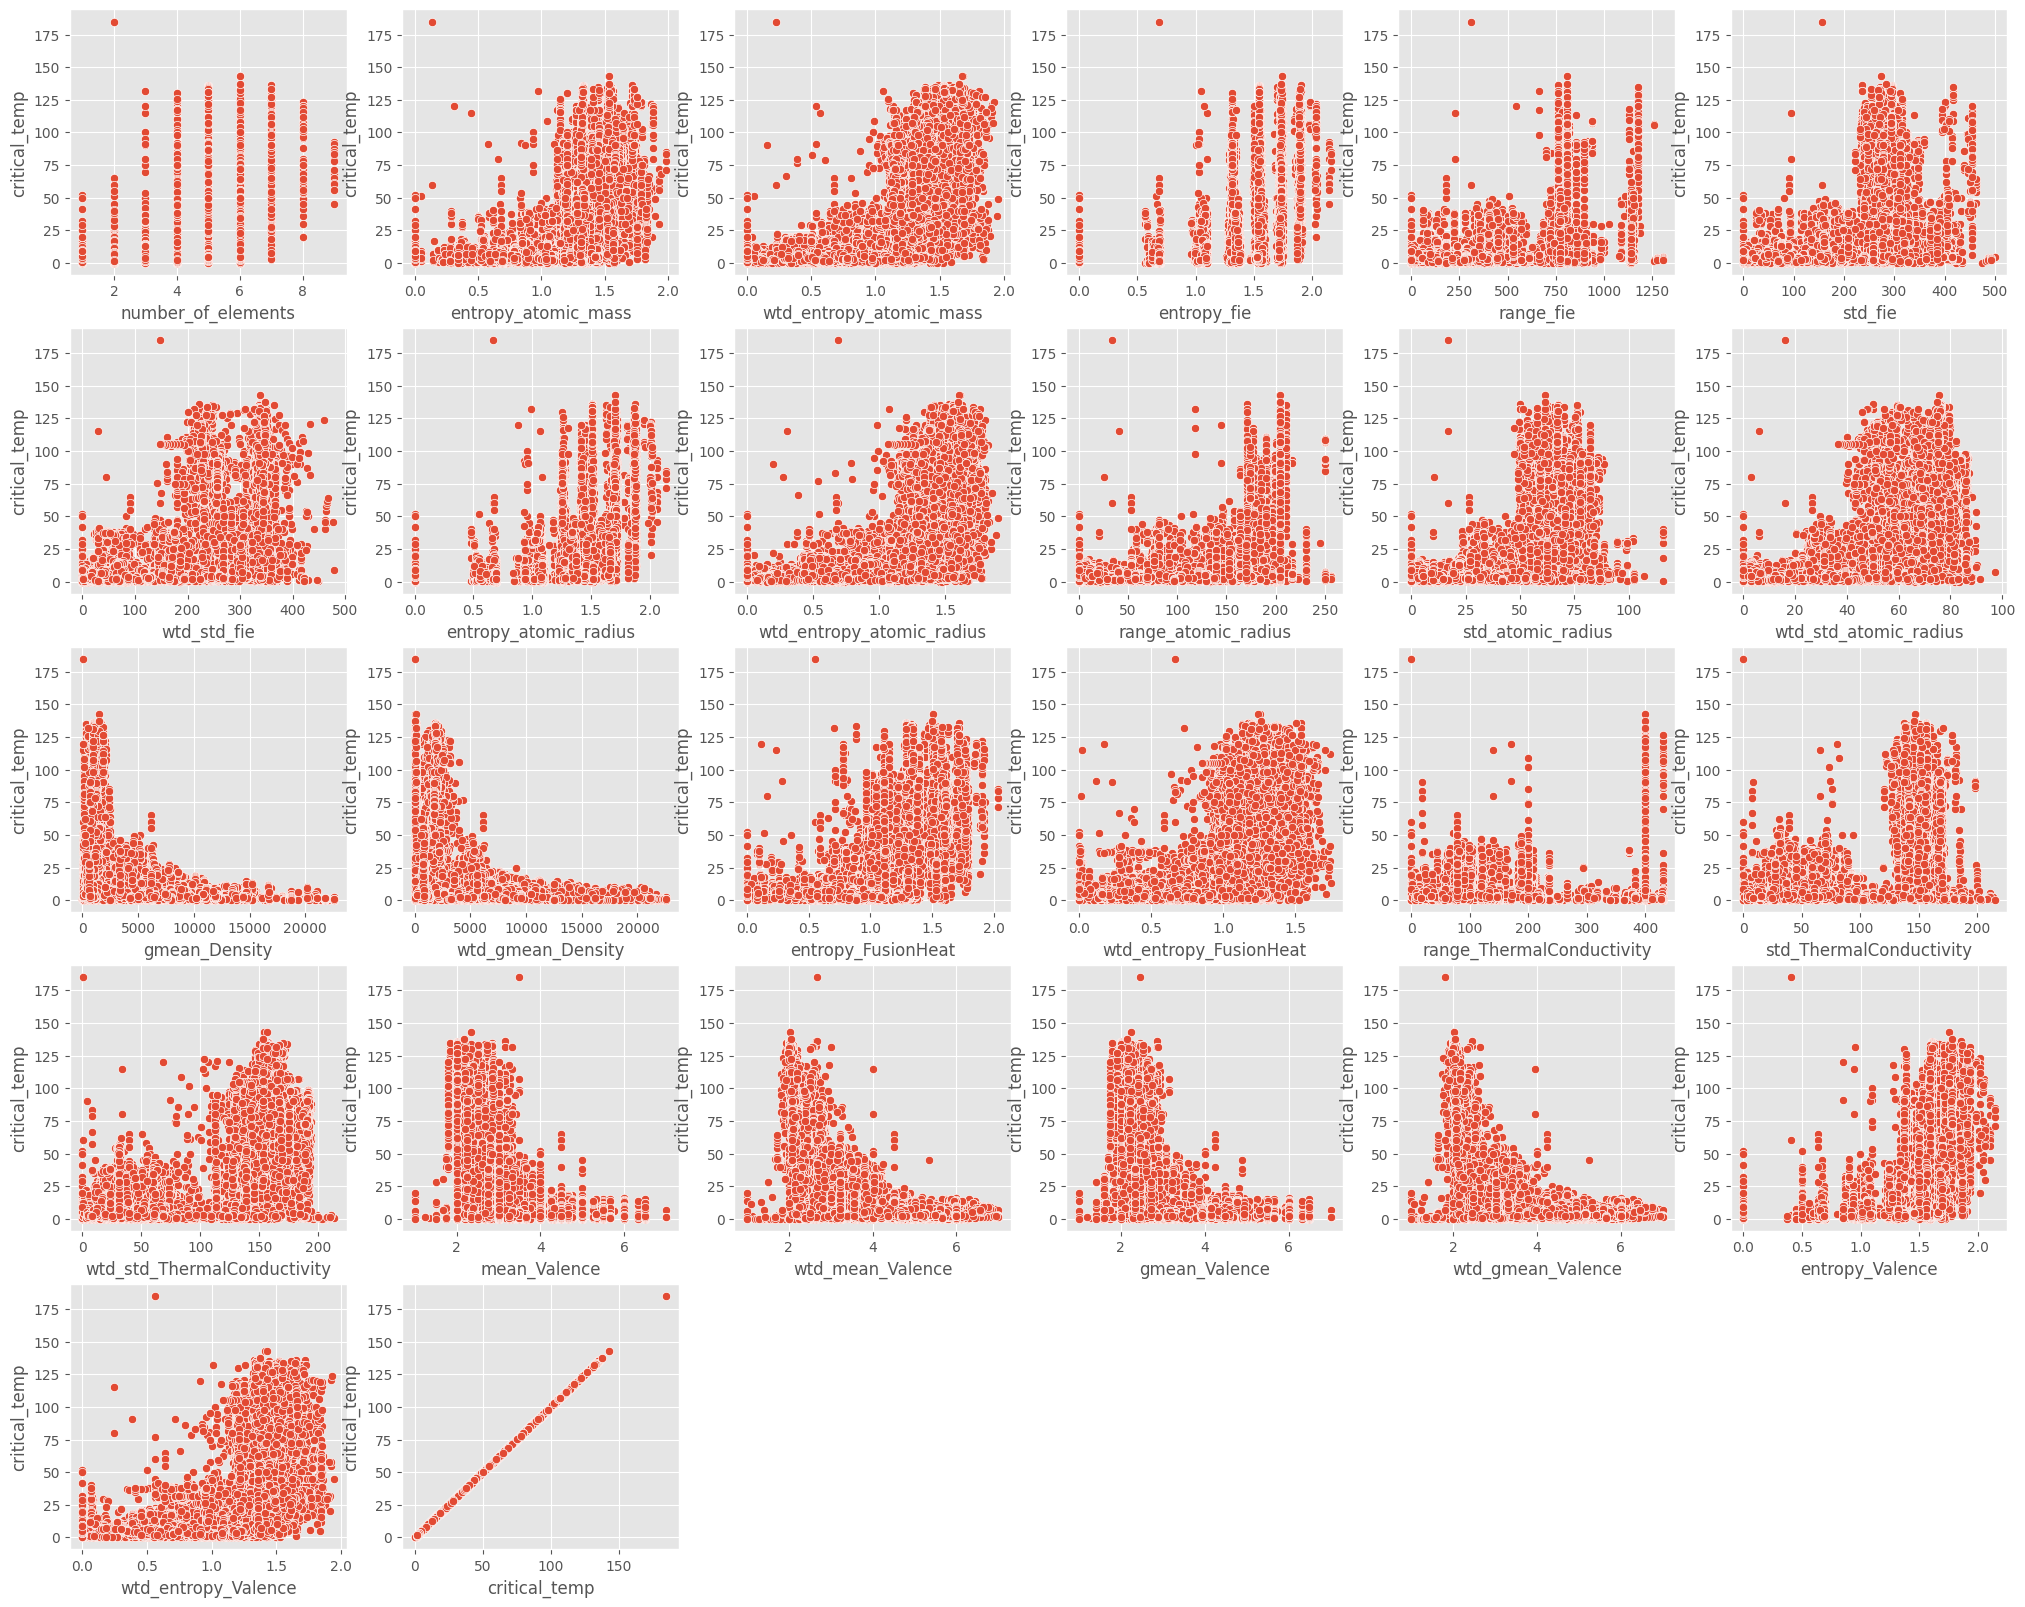

In [ ]:
# scatter plots of relevant features with the critical temperature
%matplotlib inline

relevant_features_df = supercon[selected_columns]

fig = plt.figure(figsize=(25,20))

for i in range(len(selected_columns)):
    column = relevant_features_df.columns[i]
    sub = fig.add_subplot(5, 6, i + 1)
    chart = sns.scatterplot(x=column, y=supercon['critical_temp'], data=relevant_features_df, legend=True)


Note that many of these variables do not have an approximately linear relationship with the target variable. We will have to consider this when modeling.

In [ ]:
# creating a data frame with just the selected features
selected_columns = relevant_features.index.tolist()
selected_columns
corr_supercon=supercon[selected_columns]

In [ ]:
corr_supercon.corr().head()

,number_of_elements,entropy_atomic_mass,wtd_entropy_atomic_mass,entropy_fie,range_fie,std_fie,wtd_std_fie,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,gmean_Density,wtd_gmean_Density,entropy_FusionHeat,wtd_entropy_FusionHeat,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,critical_temp
number_of_elements,1.000000,0.939160,0.881645,0.973117,0.780533,0.672952,0.717067,0.972161,0.903846,0.767407,0.623833,0.694570,-0.629791,-0.649162,0.900543,0.860515,0.695219,0.600942,0.664749,-0.608159,-0.647406,-0.617258,-0.658135,0.967733,0.892339,0.600394
entropy_atomic_mass,0.939160,1.000000,0.889484,0.964635,0.702738,0.599991,0.659554,0.972272,0.879885,0.707590,0.565913,0.647073,-0.545615,-0.573417,0.928139,0.845098,0.677726,0.596952,0.649491,-0.550425,-0.585770,-0.553240,-0.591733,0.963562,0.861173,0.542894
wtd_entropy_atomic_mass,0.881645,0.889484,1.000000,0.891840,0.744236,0.660683,0.730985,0.890422,0.961406,0.774122,0.660600,0.737999,-0.596867,-0.655780,0.834760,0.873994,0.688622,0.618417,0.684237,-0.583124,-0.643801,-0.585562,-0.649735,0.897515,0.918101,0.626536
entropy_fie,0.973117,0.964635,0.891840,1.000000,0.767159,0.671133,0.708184,0.997735,0.919990,0.773318,0.647889,0.710134,-0.623539,-0.642618,0.916446,0.864392,0.683055,0.601542,0.649867,-0.595443,-0.623451,-0.607118,-0.636747,0.992695,0.907751,0.567156
range_fie,0.780533,0.702738,0.744236,0.767159,1.000000,0.981555,0.940022,0.740203,0.797252,0.908547,0.864489,0.871663,-0.815578,-0.802456,0.592858,0.656772,0.682535,0.640944,0.669721,-0.740165,-0.730212,-0.756974,-0.745648,0.781973,0.771590,0.600179


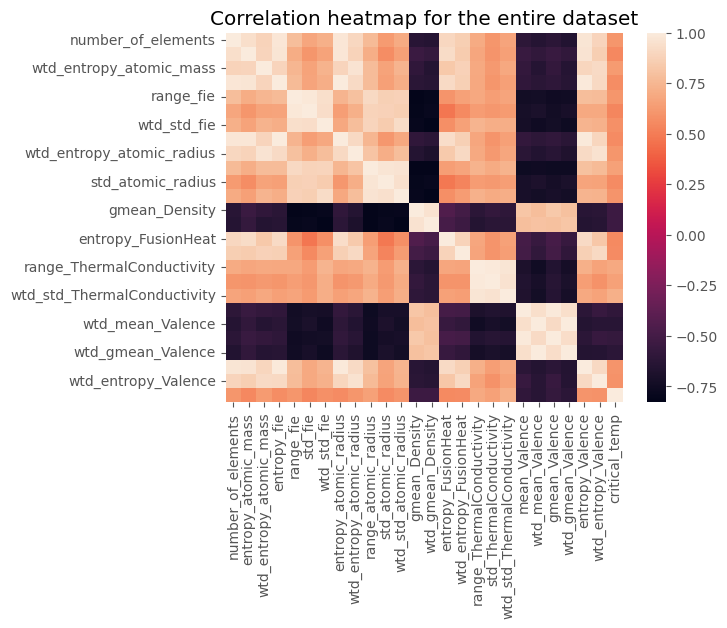

In [ ]:
corr_matrix = corr_supercon.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation heatmap for the entire dataset')
plt.show()


While looking at the selected superconductor data set is beneficial in visualizing the relationships between the features and the target variable, we might not use these features while modeling. Why? The features we selected account for strong relationships with the target variable but do not tell us how the selected features are correlated with each other. This may lead to redundant features and multicollinearity, where several independent variables are related to one another. Multicollinearity can affect the performance of several models, like linear regression, which operate under the assumption of independence of independent variables.


By looking at the heatmap above, we can see how highly correlated our selected features are. Most of our features seem to have high positive correlations, and a significant amount of features are highly negatively correlated. Almost all of our features have correlation magnitudes of over 0.5.


# Non NN Modeling without dimensionality reduction
As a baseline metric, we will run our models without dimensionality reduction, meaning we will use all 81 features as input in our models. This will not be ideal for several of our models, as many of our variables are highly correlated. However this will serve as a baseline metric.


## What models will we use?
- Linear Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression
- XGB Regression

<details>
<summary>More details on Models</summary>

<!-- Your hidden content goes here -->

Multiple Linear Regression:
<details>
<summary>Click to expand</summary>

- In multiple linear regression, we find slope estimates for all predictor variables to create a line or hyperplane that best fits the data.
- The line or plane of best fit is the line or plane that minimizes the sum of squared residuals, where the residuals are the distance between the predicted values (y hat)  and the actual values (y) for all n observations in the training data

<div style="display: flex; justify-content: center; align-items: center; height: 300px;">
  <img src="https://drive.google.com/uc?id=1vhlOv9VXi2jU5cKiwqDSz-ExsmLxXMSS" width="200">
</div>

- This model operates under the assumptions that:
  - There is a linear relationship between the dependant variable (critical temperature) and the independent variables (our 81 features)
  - There is little to no multicollinearity: the features are not highly correlated
- Image source:
James, Gareth, et al. An Introduction to Statistical Learning: With Applications in R. Springer, 2021. pg 69, 3.16

</details>


Ridge Regression
<details>
<summary>Click to expand</summary>

- Ridge regression aims to address issues linear regression faces when modeling in higher dimensions, like overfitting
- Instead of just seeking slope estimates that minimize the RSS, in ridge regression we seek slope estimates for the predictors that minimize the RSS + a regularization term (λ * sum of the squared coefficients)
<div style="text-align:center;">
  <img src="https://drive.google.com/uc?id=1Wxb8OOjbgUaEDcze1pcZQsGBUez0DA6_" width="200">
</div>

- Lambda controls the strength of regularization→ as lambda tends to infinity, regularization increases, and the coefficients of the independent variables shrink close to 0.
- This discourages the model from overfitting to noise in the data
- Image source:
James, Gareth, et al. An Introduction to Statistical Learning: With Applications in R. Springer, 2021. pg 237, 6.5



</details>

Lasso Regression
<details>
<summary>Click to expand</summary>

- In lasso regression, we seek slope estimates for the predictors that minimize the RSS + a slightly different regularization term (λ * sum of the absolute value of coefficients).
- When we increase the hyperparameter lambda, regularization increases, and the slope coefficients shrink close to or exactly to 0.
<div style="text-align:center;">
  <img src="https://drive.google.com/uc?id=1Ub-cfbH84Py6JnSJKJ9F2B1fr3pwskG_" width="200">
</div>
- Unlike ridge regression, lasso regression can actually shrink some coefficients to exactly 0.
- This method performs natural feature selection by eliminating certain predictors from the model, making the model easier to interpret.
- Image source:
James, Gareth, et al. An Introduction to Statistical Learning: With Applications in R. Springer, 2021. pg 241, 6.7

</details>

Support Vector Regression
<details>
<summary>Click to expand</summary>

- Support Vector Regression works by transforming the data into a higher dimensional space and then finding a line or curve that is closest to all the points in this transformed space.
- SVR finds critical points, called support vectors, that are most essential for defining the line or curve
- SVR allows a margin around this line or curve. The goal is to find a line or curve that maximizes the number of points in this margin
- The line or curve that contains the maximum points within the margin and that is closest to the support vectors is the regression model

</details>

Decision Tree Regression:

<details>
<summary>Click to expand</summary>

- Decision tree regression work by recursively splitting the data based on feature characteristics
- Let us look at an example where we attempt to predict the salary of an employee based of two features: years worked and number of previous jobs

<div style="display: flex; justify-content: center; align-items: center; height: 300px;">
  <img src="https://drive.google.com/uc?id=15wNx0bnaQ0hmx3gUUF4idJpJ33TsY7b0" width="400">
</div>

- In training our model, we first split the data based on condition 1: whether the person has worked less than five years. We get the number 5 by averaging all the salaries of people who worked less than five years
- Then we split on whether the person has had 2 or more jobs. We land upon 10 by averaging the salaries of all the people who have worked more than five years and have had less less than 2 jobs
- If we want to predict the salary of a new worker, (worked for 6 years and has had 1 previous job), we simple fall down the decision tree and arrive at 10, which is the predicted salary of the employee
- This is obviously a simplified version of the algorithm, but it demonstrates the idea well enough

</details>


Random Forest Regression:
<details>
<summary>Click to expand</summary>

- Random Forest Regression combines multiple decision trees to make predictions  
- We build each decision tree in the random forest using a random sample with replacement (bootstrapped sample) from the original data set
- For each tree, as each split, a random subset of m of the p total predictors are considered for the split criterion. Only one of the m predictors is used for the split. This diversifies the trees and makes the model less prone to overfitting.
- For previously unseen data, we fall down each of the decision trees and average the predicted values from each decision tree. This averaged value is our random forest prediction

</details>



XGB Regression:
<details>
<summary>Click to expand</summary>

- XGB regression is another type of ensemble, tree based model
- Instead of building trees independently based on bootstrapped samples like in the random forest, we build trees sequentially based on the results of the previous trees
- XGB regression begins with a set of predictions (such as the average of the target variable), and then finds the errors by comparing the initial predictions to the actual values.
- It then builds another tree to minimize the errors (residuals) from the previous tree
- The goal is that each iterative tree should have a smaller RSS, as the "next" tree should correct for the errors in the previous tree for more accurate predictions
- XGB combines the predictions from the initial tree and the revised tree to get a better estimate
- It continues building these trees to correct for errors in the  predictions, which results in a stronger model made of all combined trees

</details>
</details>

## What metrics will we use?
- Mean Square Error
- Coefficient of Determination

<details>
<summary> More details on Metrics</summary>

### Mean square Error
- Mean square error allows us to quantify the test error in a regression model by taking the average of the squared residuals
- A residual is the difference between the predicted value and the observed value
- Our goal is to minimize this value:

<div align="center">
  <img src="https://drive.google.com/uc?id=1W3GmqETCx3y7uuew8SGTGHgw1FxrdBoX" width="200">
</div>

- Yi: the true critical temperature for a material
- Yi hat: the critical temperature we predicted based of our model
- N: the total number of observations/ materials in our test data
-Image source:
James, Gareth, et al. An Introduction to Statistical Learning: With Applications in R. Springer, 2021. pg 29, 2.5




### Coefficient of Determination
- The R^2 value is the proportion of variance in the target variable (the critical temperature) that can be attributed to the variation in the independent variables (the 81 features)
- This is a metric between 0 and 1, where a model with a higher R^2 is a better fit and model with a lower R^2 is a poorer fit
- Our goal is to maximize this value


</details>



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
import xgboost as XGB

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


- Before we begin experimenting with models, we must split our data into training data and testing data.
- Training data is data from which the model is built.
- Testing data is used to evaluate the performance of our model on previously unseen data.



In [ ]:
X=supercon.drop(columns=['critical_temp'])
y=supercon['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before we begin modeling, we scale all our features so that they have a mean of 0 and standard deviation of 1. Why do we do this? Oftentimes, different features have different magnitudes and units. Feature scaling ensures that all features have similar magnitudes, which prevents certain features (features with larger magnitudes) from dominating the training process.
- Below, we use a simple pipeline for reproducibility. We first scale the features and then use the models mentioned above.


In [ ]:
# simple pipeline for reproducibility


scaled_pipelines = {
    'Lin reg scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Linear Regression', LinearRegression())
    ]),
    'Ridge reg scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Ridge Regression', Ridge(max_iter=10000))
    ]),
    'Lasso reg scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Lasso Regression', Lasso(max_iter=10000))
    ]),
    'SVR scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Support Vector Regressor', SVR())
    ]),
    'DT scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Decision Tree', DTR())
    ]),
    'RF scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('Random Forest', RFR())
    ]),
    'XGB scaled': Pipeline([
        ('scaler', StandardScaler()),
        ('XGB', XGB.XGBRegressor(random_state=42))
    ]),
}

In [ ]:
# since we are interested in finding the hyperparameters that reduce RMSE, we create parameter grids for all models
param_grid = {
    'Lin reg': {},
    'Ridge reg': {'Ridge Regression__alpha': [0.1, 1.0]},
    'Lasso reg': {'Lasso Regression__alpha': [0.1, 1.0]},
    'SVR': {
        'Support Vector Regressor__C': [0.1, 1.0],
        'Support Vector Regressor__kernel': ['linear', 'rbf']
    },
    'DT': {'Decision Tree__max_depth': [None, 10]},
    'RF': {
        'Random Forest__n_estimators': [100],
        'Random Forest__max_depth': [None, 10]
    },
    'XGB': {
        'XGB__n_estimators': [100, 200],
        'XGB__learning_rate': [0.01, 0.1],
        'XGB__max_depth': [3, 4],
        'XGB__min_child_weight': [1, 3],
        'XGB__subsample': [0.8, 0.9],
        'XGB__colsample_bytree': [0.8, 0.9],
        'XGB__gamma': [0, 0.1]
    }
}


### Understanding Parameter Grids

**Linear Regression:**

<details>
  <summary>Click to Expand</summary>

  - **fit_intercept**: [`True`, `False`]
    - Whether or not we calculate the intercept in the equation.
    - The intercept is the `b0` value: the value of the critical temperature when all predictors are held as 0.
    - If we put `fit_intercept=False`, the intercept will be set to 0, and the line will pass through the origin. If we put `fit_intercept=True`, it will calculate an intercept value.
</details>

**Ridge Regression:**

<details>
  <summary>Click to Expand</summary>

  - **alpha**: Positive value that controls the strength of regularization.
    - Larger alpha results in more regularization, shrinking coefficients, and less overfitting.
    - Smaller alpha results in less regularization, allowing larger coefficients but potentially leading to overfitting.
    - Serves a similar purpose as lambda.
</details>

**Lasso Regression:**

<details>
  <summary>Click to Expand</summary>

  - **alpha**: Similar to Ridge Regression, it controls the strength of regularization.
</details>

**Support Vector Regression:**

<details>
  <summary>Click to Expand</summary>

  - **C**: Regularization parameter.
    - Smaller C results in less regularization, allowing a larger margin and preventing overfitting.
    - Larger C results in more regularization, leading to a smaller margin and closer fit to training data, potentially overfitting.
  - **kernel**:
    - Used to transform data into a higher-dimensional space.
    - Options include:
      - **Linear**: Represents a linear relationship between features and the target variable.
      - **RBF (Radial Basis Function)**: Used for capturing nonlinear patterns in data.
</details>

**Decision Tree:**

<details>
  <summary>Click to Expand</summary>

  - **Max_depth**: Number of levels from the root node to the leaf node.
    - Example with max_depth=2:
      - Root node (Years < 5) = Level 0
      - Decision node (Jobs > 2) = Level 1
      - Leaf nodes (15) and (10) = Level 2

      <div style="display: flex; justify-content: center; align-items: center; height: 300px;">
  <img src="https://drive.google.com/uc?id=15wNx0bnaQ0hmx3gUUF4idJpJ33TsY7b0" width="400">
</div>
</details>

**Random Forest:**

<details>
  <summary>Click to Expand</summary>

  - **N_estimators**: Number of decision trees to use in the random forest.
  - **Max_depth**: Similar to Decision Trees.
  

</details>

**XGBoost:**

<details>
  <summary>Click to Expand</summary>

  - **N_estimators**: Specifies how many decision trees to create.
    - For example, 100 decision trees means XGBoost combines predictions from all 100 trees to get the final result.
  - **Learning_rate**: Controls how quickly the model learns from training data.
    - Small learning rates lead to slower learning but may fit training data well, potentially overfitting.
    - Large learning rates result in faster learning but may underfit the data.
  - **Max_depth**: The number of levels from the root node to the leaf node for each model.
  - **Min_child_weight**:
    - Minimum sum of sample weights required for a parent node to be divided into child nodes.
    - Controls the complexity of the model by altering child weights.
  - **Subsample**: Percent of training data used to build each tree.
    - Values less than 1 may prevent overfitting by learning from different parts of the data.
  - **Colsample_bytree**: Percentage of features randomly chosen and used for each tree.
    - Leads to more robust models as each tree is trained on slightly different data.
  - **Gamma**: Minimum loss reduction needed to justify splitting a leaf node.
</details>

####  Understanding GridSearchCV
<details>
<summary>Click to Expand</summary>


- GridSearchCV checks which combination of hyperparameters maximizes the scoring function for a particular model type.
- Let us consider how GridSearchCV with five folds will work using the XGB model type. Based on the parameter grid, we will check 14 unique XGB models  because there are 2 possible values for each hyperparameter and there are 7 total hyperparameters (2*7=14).
- For each model, we use cross validation with five folds to maximize the scoring criteria, neg mean square error.
- We split the training data into five folds. We hold out the first fold as the validation set and build our random forest model on the remaining four folds. Then we evaluate the model's performance on the validation set using the neg mean square error loss function.
- We repeat this process four more times, so that each of the folds has been used as the validation set. We average the five neg mean square errors from each of the validation sets, and store the averaged value as the score for that particular XGB model.
- Since we have 14 possible XGB models, we repeat this process a total of 14 times, so that we have 14 negative root mean square error scores.
- The model with the largest negative root mean square error is stored at the best estimator for the XGB model.


#### GridSearchCV Parameters
- estimator=pipe: the model type we are checking (e.g. XGB)
- param_grid= param_grid: the parameter grid we are interested in for a particular model type (e.g. the XGB parameter grid)
- cv=5: How many folds
- scoring= ‘neg_mean_squared_errors’: the scoring function to optimize
- N_jobs=-1 : How many jobs to run in parallel. -1 means using all processors


#### Why Neg Mean Square error?
Note that the scoring metric we use is negative mean square error. Why is that? GridSearchCV is designed to choose the estimator that maximizes the scoring function. If we simply put root mean square error as the scoring function, GridSearch will save the best estimator as the estimator with the largest RMSE, which is incorrect.


Example: Say for a particular regressor, we have six potential models. The root mean square errors of these models are:


- 5,9,2,1,3,4


Since grid search seeks to maximize the scoring function, it will choose the best model as the model that has the RMSE of 9. However this is the worst model. To correct for this, we negate all the RMSEs.


- -5, -9, -2, -1, -3, -4


Now we let grid search maximize the scoring function, so that the model that has RMSE of -1 is saved as the best estimator.

</details>


In [ ]:
# creating a dictionary of the parameter grids so that we can iterate through them

pipeline_param_grids = {
    'Lin reg scaled': param_grid['Lin reg'],
    'Ridge reg scaled': param_grid['Ridge reg'],
    'Lasso reg scaled': param_grid['Lasso reg'],
    'SVR scaled': param_grid['SVR'],
    'DT scaled': param_grid['DT'],
    'RF scaled': param_grid['RF'],
    'XGB scaled': param_grid['XGB'],
}


In [ ]:
# fitting the models and saving the best model for each regressor type in the best_model list
best_models=[]
for pipe_name, pipe in scaled_pipelines.items():
    param_grid = pipeline_param_grids.get(pipe_name, {})
    grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)


In [ ]:
# creating a RMSE and R2 data frame to store our results
results_rmse= pd.DataFrame(columns=['Model Name','All features'])
results_r2= pd.DataFrame(columns=['Model Name','All features'])
results_rmse['Model Name']=['Linear Regression','Ridge Regression','Lasso Regression','SVR','DT','RF','XGB']
results_r2['Model Name']=['Linear Regression','Ridge Regression','Lasso Regression','SVR','DT','RF','XGB']

In [ ]:
# adding the RMSE and R2 of each of the best estimators to our list
rmse_list=[]
r2_list=[]
for i, estimator in enumerate(best_models):
  y_pred=estimator.predict(X_test)
  rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
  r2 = r2_score(y_test, y_pred)
  rmse_list.append(rmse)
  r2_list.append(r2)

In [ ]:
results_rmse['All features']=rmse_list
results_r2['All features']=r2_list

In [ ]:
results_rmse

,Model Name,All features
0,Linear Regression,17.649935
1,Ridge Regression,17.650626
2,Lasso Regression,18.454457
3,SVR,16.136807
4,DT,11.751401
5,RF,9.410241
6,XGB,10.740811


In [ ]:
results_r2

,Model Name,All features
0,Linear Regression,0.735360
1,Ridge Regression,0.735339
2,Lasso Regression,0.710684
3,SVR,0.778790
4,DT,0.882686
5,RF,0.924773
6,XGB,0.901996


In [ ]:
# @title
fig1=px.bar(results_rmse, x='Model Name', y='All features',title='Root Mean Square Error Per Model',color_discrete_sequence=['lightblue'])
fig1.update_layout(xaxis={'categoryorder':'total ascending'})
fig1.show(renderer='colab')

In [ ]:
# @title

fig1=px.bar(results_r2, x='Model Name', y='All features',title='R^2 Per Model',color_discrete_sequence=['pink'])
fig1.update_layout(xaxis={'categoryorder':'total descending'})
fig1.show(renderer='colab')



- When looking at RMSE, the tree based models (RF, XGB, and DT) performed almost twice as well as our linear models (SVR was the middle man).
- Why is it that tree based models performed significantly better than the linear models?
  - Nonlinearity: An obvious reason is that the relationship between the critical temperature and the individual features is not linear. In this case, the assumption of the linear regression model is violated, which means that linear regression is likely not the best fit for the model.
  - Multicollinearity: Moreover, linear regression models assume little to no multicollinearity. They assume that the effect of each variable on the critical temperature in independant. In problems where feature interaction is at play (like ours, given the heat map of our highly correlated variables) tree based models are often the best idea.
  - For a simple example of how tree based models handle feature interactions, we need only look at the previous example:
<div style="display: flex; justify-content: center; align-items: center; height: 300px;">
  <img src="https://drive.google.com/uc?id=15wNx0bnaQ0hmx3gUUF4idJpJ33TsY7b0" width="400">
</div>
  - Each child node is created from the splitting node above it. The values 10 and 15 come from the interaction of 2 features: years worked and previous jobs held. In this way, tree based models can be optimal for handling feature interaction.


Why XGB and Random Forest perform best:
- Of our three tree based models, it is intuitive that XGB and Random Forest perform better than decision trees. They are composed of multiple decision trees.
- Random forest is less sensitive to noise and outliers due to the bootstrapping method used to build each tree, which could be a reason why RF performed slightly better than XGB.


Both random forest and xgb algorithms are incredibly powerful because they give us feature importance scores. Feature importance values tell us the importance of each feature in making predictions, showing us which input variables affect the target variable most significantly.


Random Forest
- Feature importance scores are calculated based on how much impurity in the target variable is reduced when a certain feature is used as a splitting node
- These are all positive values that sum up to 1.


XGBoost
- XGBoost calculates feature importance by looking at how many times a feature is used to split data in all the trees and the improvement in the model's performance based on each feature.
- These scores can be positive or negative
- positive scores: improve predictions
- negative scores: worsen predictions

Let us examine the top ten most important features for RF and XGB.

In [ ]:
# get the index of the 'RF scaled' pipeline in the scaled_pipelines dictionary
rf_index = list(scaled_pipelines.keys()).index('RF scaled')

# access the best estimator for the 'RF scaled' pipeline from best_models
rf_best_estimator = best_models[rf_index]

# get feature importances
rf_feature_importances = rf_best_estimator.named_steps['Random Forest'].feature_importances_

# create a DataFrame to store feature names and importances
rf_features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})

# sort the DataFrame by importance in descending order
rf_features_df = rf_features_df.sort_values(by='Importance', ascending=False)

# plot the top 10 features by importance
fig1 = px.bar(rf_features_df.head(10), x='Feature', y='Importance', title='Random Forest Feature Importance', color_discrete_sequence=['purple'])
fig1.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)
fig1.show(renderer='colab')

In [ ]:
# get the index of the 'XGB scaled' pipeline in the scaled_pipelines dictionary
xgb_index = list(scaled_pipelines.keys()).index('XGB scaled')

# access the best estimator for the 'XGB scaled' pipeline from best_models
xgb_best_estimator = best_models[xgb_index]

# get XGBoost feature importances
xgb_feature_importances = xgb_best_estimator.named_steps['XGB'].feature_importances_

# create a DataFrame to store feature names and importances
xgb_features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_feature_importances})

# sort the DataFrame by importance in descending order
xgb_features_df = xgb_features_df.sort_values(by='Importance', ascending=False)

# display the top 10 features by importance
xgb_features_df.head(10)

# plot the top 10 features by importance
fig1 = px.bar(xgb_features_df.head(10), x='Feature', y='Importance', title='XGB Feature Importance', color_discrete_sequence=['magenta'])
fig1.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)
fig1.show(renderer='colab')




- As we can see both RF and XGBoost determined that Thermal conductivity range and weight gmean thermal conductivity were the most significant features used in splitting nodes that lead to the best predictions.
- Earlier, we used all our features in our linear, ridge, and lasso model. Let us now try to just use the selected 10 most significant features in the random forest and xgb model in linear, ridge, and lasso regression.
- In this way, we will use the RF and XGB algorithms to perform feature selection for our non-tree based models.
- We begin by creating a data frame with othe the RF/XGB selected features.

In [ ]:
rf_features=(rf_features_df.head(10))['Feature'].tolist()
xgb_features=(xgb_features_df.head(10))['Feature'].tolist()
rf_xgb_features=list(set(rf_features+xgb_features))
rf_xgb_features

['wtd_mean_Valence',
 'wtd_entropy_ThermalConductivity',
 'wtd_std_ElectronAffinity',
 'range_ThermalConductivity',
 'wtd_std_Valence',
 'std_atomic_mass',
 'range_atomic_radius',
 'wtd_mean_ThermalConductivity',
 'gmean_ElectronAffinity',
 'gmean_Density',
 'wtd_gmean_ThermalConductivity',
 'mean_Density',
 'wtd_gmean_Valence']

In [ ]:
# creating a data frame

rf_xgb_df=supercon[rf_xgb_features]
rf_xgb_df.head()

,wtd_mean_Valence,wtd_entropy_ThermalConductivity,wtd_std_ElectronAffinity,range_ThermalConductivity,wtd_std_Valence,std_atomic_mass,range_atomic_radius,wtd_mean_ThermalConductivity,gmean_ElectronAffinity,gmean_Density,wtd_gmean_ThermalConductivity,mean_Density,wtd_gmean_Valence
0,2.257143,0.262848,42.558396,399.97342,0.437059,51.968828,205,61.015189,60.123179,724.953211,0.621979,4654.35725,2.219783
1,2.257143,0.567706,41.667621,429.97342,0.468606,47.094633,205,61.372331,69.833315,1237.095080,0.619735,5821.48580,2.210679
2,2.271429,0.250477,41.639878,399.97342,0.444697,51.968828,205,60.943760,60.123179,724.953211,0.619095,4654.35725,2.232679
3,2.264286,0.257045,42.102344,399.97342,0.440952,51.968828,205,60.979474,60.123179,724.953211,0.620535,4654.35725,2.226222
4,2.242857,0.272820,43.452059,399.97342,0.428809,51.968828,205,61.086617,60.123179,724.953211,0.624878,4654.35725,2.206963


In [ ]:
# checking correlation matrix.
rf_xgb_df.corr()

,wtd_mean_Valence,wtd_entropy_ThermalConductivity,wtd_std_ElectronAffinity,range_ThermalConductivity,wtd_std_Valence,std_atomic_mass,range_atomic_radius,wtd_mean_ThermalConductivity,gmean_ElectronAffinity,gmean_Density,wtd_gmean_ThermalConductivity,mean_Density,wtd_gmean_Valence
wtd_mean_Valence,1.000000,0.140405,-0.249530,-0.743025,0.259758,-0.336619,-0.755940,-0.276252,0.503585,0.781162,0.408974,0.626704,0.994917
wtd_entropy_ThermalConductivity,0.140405,1.000000,0.080105,-0.257563,0.448624,0.104529,-0.104806,-0.163410,-0.129606,0.100966,0.156535,0.049840,0.104252
wtd_std_ElectronAffinity,-0.249530,0.080105,1.000000,0.353965,0.264885,0.365272,0.491185,0.060245,-0.000538,-0.410130,-0.356376,-0.281653,-0.278788
range_ThermalConductivity,-0.743025,-0.257563,0.353965,1.000000,-0.290815,0.412798,0.735395,0.435487,-0.281042,-0.615252,-0.439170,-0.374733,-0.725257
wtd_std_Valence,0.259758,0.448624,0.264885,-0.290815,1.000000,0.122696,-0.093316,-0.207088,0.144748,-0.000461,0.060106,-0.016189,0.169962
std_atomic_mass,-0.336619,0.104529,0.365272,0.412798,0.122696,1.000000,0.542843,0.129787,-0.110887,-0.364170,-0.233388,-0.053814,-0.351741
range_atomic_radius,-0.755940,-0.104806,0.491185,0.735395,-0.093316,0.542843,1.000000,0.200394,-0.284059,-0.815493,-0.541049,-0.588296,-0.761090
wtd_mean_ThermalConductivity,-0.276252,-0.163410,0.060245,0.435487,-0.207088,0.129787,0.200394,1.000000,-0.110897,-0.096791,0.490890,-0.032023,-0.260554
gmean_ElectronAffinity,0.503585,-0.129606,-0.000538,-0.281042,0.144748,-0.110887,-0.284059,-0.110897,1.000000,0.316510,0.142212,0.285656,0.494987
gmean_Density,0.781162,0.100966,-0.410130,-0.615252,-0.000461,-0.364170,-0.815493,-0.096791,0.316510,1.000000,0.524167,0.889000,0.798109


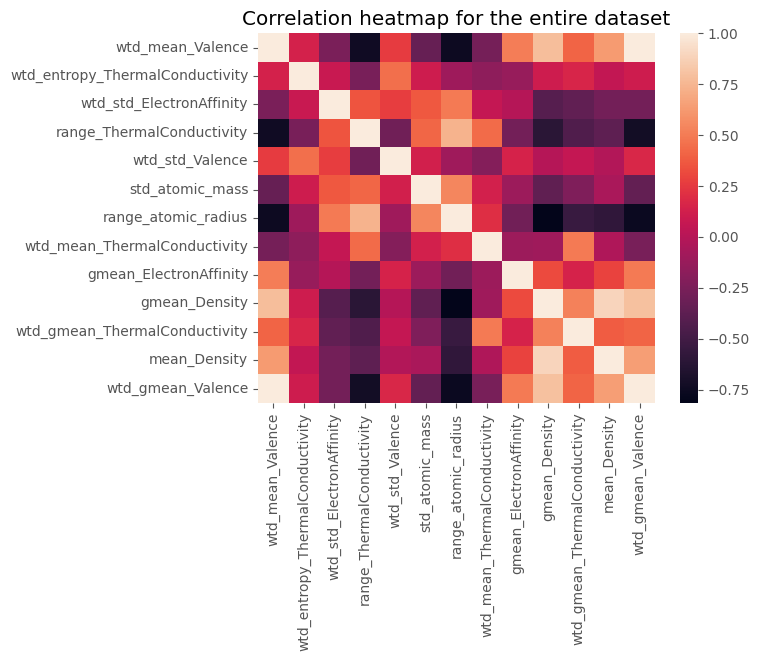

In [ ]:
corr_matrix = rf_xgb_df.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation heatmap for the entire dataset')
plt.show()

- We still have some very correlated data, however it is certainly not as bad as our data frame with all variables.
- Let us now apply linear, lasso, and ridge, and support vector regression with just these variables.


In [ ]:
# splitting the data
X=rf_xgb_df
y=supercon['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16957, 13)
(4240, 13)
(16957,)
(4240,)


Fitting the reduced data and adding it to the RMSE and R2 list

In [ ]:
best_models=[]
for pipe_name, pipe in scaled_pipelines.items():
    if pipe_name=='DT scaled':
      break
    param_grid = pipeline_param_grids.get(pipe_name, {})
    grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your data
    best_models.append(grid_search.best_estimator_)


In [ ]:
rmse_list=[]
r2_list=[]
for i, estimator in enumerate(best_models):
  y_pred=estimator.predict(X_test)
  rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
  r2 = r2_score(y_test, y_pred)
  rmse_list.append(rmse)
  r2_list.append(r2)

In [ ]:
results_rmse.loc[:3, 'Selected_rfxgb_features'] = rmse_list
results_r2.loc[:3, 'Selected_rfxgb_features'] = r2_list



In [ ]:
rel_rmse = results_rmse.iloc[0:4]

In [ ]:
rel_rmse

,Model Name,All features,Selected_rfxgb_features
0,Linear Regression,17.649935,20.222139
1,Ridge Regression,17.650626,20.222243
2,Lasso Regression,18.454457,20.279512
3,SVR,16.136807,16.193710


In [ ]:
results_r2[0:4]

,Model Name,All features,Selected_rfxgb_features
0,Linear Regression,0.735360,0.652605
1,Ridge Regression,0.735339,0.652601
2,Lasso Regression,0.710684,0.650631
3,SVR,0.778790,0.777227


In [ ]:
# @title
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=rel_rmse['Model Name'],
        y=rel_rmse['All features'],
        text=rel_rmse['All features'],  # Hovertext
        textposition='auto',    # Display hover text
    ),
    go.Bar(
        name='Selected_rfxgb_Features',
        x=rel_rmse['Model Name'],
        y=rel_rmse['Selected_rfxgb_features'],
        text=rel_rmse['Selected_rfxgb_features'],   # Hover text
        textposition='auto',    # Display hover text
    )
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='RMSE',
    title='RMSE values'
)

fig.show(renderer='colab')

In [ ]:
rel_r2 = results_r2.iloc[0:4]

In [ ]:
rel_r2

,Model Name,All features,Selected_rfxgb_features
0,Linear Regression,0.735360,0.652605
1,Ridge Regression,0.735339,0.652601
2,Lasso Regression,0.710684,0.650631
3,SVR,0.778790,0.777227


In [ ]:
# @title
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=rel_r2['Model Name'],
        y=rel_r2['All features'],
        text=rel_r2['All features'],  # Hover text
        textposition='auto',    # Display hover text
    ),
    go.Bar(
        name='Selected_rfxgb_Features',
        x=rel_r2['Model Name'],
        y=rel_r2['Selected_rfxgb_features'],
        text=rel_r2['Selected_rfxgb_features'],   # Hover text
        textposition='auto',    # Display hover text
    )
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='R2',
    title='R2 values'
)

fig.show(renderer='colab')

RMSE


- The RMSE for linear regression, ridge regression, and lasso regression increased when using only the RF and XGB selected features. Why is this?
  - Loss of information: It is likely that we have lost potentially relevant information, as linear regression models usually use all features to make predictions.
  - Incorrect linear relationship assumption: We also must question whether there is a linear relationship between the predictors and the target variable. If there is not a significant linear relationship, these models will perform poorly.
  - Multicollinearity: Moreover, while our selected random forest and xgb features are less correlated, there is still multicollinearity, which contradicts the independence of independent variable assumption. This multicollinearity makes it challenging for our linear regression models to get an accurate slope estimate of the features, as it is unable to distinguish the effect of a single variable on the output variable.
- Our RMSE stayed roughly the same (the slightest decrease) using support vector regression. Why is this?
  - Nonlinearity: SVR is able to capture nonlinear relationships between features and the target variable, which may be the case in our data.
  - Handling Multicollinearity: SVR handles multicollinearity relatively well. Unlike linear regression which cares about specific coefficient values, SVR focuses on finding a hyperplane that minimizes the errors of regression while ignoring coefficient slope values.

R^2

- Our more important metric in this case is R^2. While a 3-4 point increase in RMSE is significant, we must consider how our r squared changed
- Variation in only 13 variables resulted in around 65% variations in the critical temperature for our linear regression models, and a 78% variation in the critical temperature for our SVR models.
- Let us take a look at our R^2 using all the 81 features-- around 70% in the linear regression models-- and around 75% in SVR models.
- This means that over 60 of the features resulted in only 5% variation in the target variable for our linear regression models.
- The R^2 for SVR even went up by 3% after removing 60 features!
- This could be because there are less irrelevant variables and our model could generalize better.
It seems that random forest and xgb algorithms have helped us detect some of the most important features in our data!


So far we have explored modeling using all our variables and the rf/ xgb variables. Now let experiment with using the 25 variables that had correlation coefficient magnitudes of over 0.5 with the target variable.


In [ ]:
# splitting the data
X = corr_supercon.drop('critical_temp', axis=1)
y = corr_supercon['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fitting the data
best_models=[]
for pipe_name, pipe in scaled_pipelines.items():
    param_grid = pipeline_param_grids.get(pipe_name, {})
    grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your data
    best_models.append(grid_search.best_estimator_)


In [ ]:
# adding RMSE and R^2 to the data frame
rmse_list=[]
r2_list=[]

for i, estimator in enumerate(best_models):
  y_pred=estimator.predict(X_test)
  rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
  r2 = r2_score(y_test, y_pred)
  rmse_list.append(rmse)
  r2_list.append(r2)



In [ ]:
results_rmse['Corr_features']=rmse_list
results_r2['Corr_features']=r2_list

In [ ]:
results_rmse


,Model Name,All features,Selected_rfxgb_features,Corr_features
0,Linear Regression,17.649935,20.222139,20.110577
1,Ridge Regression,17.650626,20.222243,20.110757
2,Lasso Regression,18.454457,20.279512,20.588838
3,SVR,16.136807,16.193710,18.194339
4,DT,11.751401,NaN,12.292292
5,RF,9.410241,NaN,9.551429
6,XGB,10.740811,NaN,11.374332


In [ ]:
# @title
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_rmse['Model Name'],
        y=results_rmse['All features'],
        text=results_rmse['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Selected_rfxgb_features'],
        text=results_rmse['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Corr_features'],
        text=results_rmse['Corr_features'],
        textposition='auto',
    )
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='RMSE',
    title='RMSE values by Model and Feature Set'
)

fig.show(renderer='colab')

In [ ]:

results_r2

,Model Name,All features,Selected_rfxgb_features,Corr_features
0,Linear Regression,0.735360,0.652605,0.656427
1,Ridge Regression,0.735339,0.652601,0.656421
2,Lasso Regression,0.710684,0.650631,0.639892
3,SVR,0.778790,0.777227,0.718783
4,DT,0.882686,NaN,0.871638
5,RF,0.924773,NaN,0.922499
6,XGB,0.901996,NaN,0.890094


In [ ]:
# @title
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_r2['Model Name'],
        y=results_r2['All features'],
        text=results_r2['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_r2['Model Name'],
        y=results_r2['Selected_rfxgb_features'],
        text=results_r2['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_r2['Model Name'],
        y=results_r2['Corr_features'],
        text=results_r2['Corr_features'],
        textposition='auto',
    )
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='R2',
    title='R2 values by Model and Feature Set'
)

fig.show(renderer='colab')


In [ ]:
results_r2

,Model Name,All features,Selected_rfxgb_features,Corr_features
0,Linear Regression,0.735360,0.652605,0.656427
1,Ridge Regression,0.735339,0.652601,0.656421
2,Lasso Regression,0.710684,0.650631,0.639892
3,SVR,0.778790,0.777227,0.718783
4,DT,0.882686,NaN,0.871638
5,RF,0.924773,NaN,0.922499
6,XGB,0.901996,NaN,0.890094


In [ ]:
count_common_elements = len(set(rf_xgb_features).intersection(selected_columns))
common_elements = set(rf_xgb_features).intersection(selected_columns)

print("Common elements:", common_elements)
print("Number of common elements:", count_common_elements)
# there are only four common elements in both lists.

Common elements: {'wtd_mean_Valence', 'range_ThermalConductivity', 'range_atomic_radius', 'gmean_Density', 'wtd_gmean_Valence'}
Number of common elements: 5


- Let us compare the R2 values of the model using the selected features from RFXGB and the selected features from the correlation coefficient. For the linear models, the R2 values are almost identical. This means that random forest and XGB were able to find a subset of 13 features that explained 65% of the variance in the target variable, while the method with correlation coefficients found 25 variables that explained the 65% of the variance in the target variable. (Note that only five of these variables overlapped!)


- The R^2 score improved slightly using the correlation coefficients.


- We see similar results with RMSE scores. The RMSE score is the same for the linear models and increases slightly for SVR.


- Given the reduction in variables for very similar R^2 and RMSE values, we can conclude that the RFXGB form of feature selection is more powerful than the correlation coefficient method because we use less features (a less complex, more interpretable) model to achieve similar results.


# Non NN Modeling with dimensionality reduction (PCA)

Principal Component Analysis:
- So far, we have run our models using all features, a subset of RFXGB features, and subset of features with correlation coefficients of greater than 0.5 with the target variable.
- Let us now explore how PCA dimensionality reduction can affect our results.
- Principal component analysis (PCA) is a dimensionality technique used to transform a large number of correlated features into a lower-dimensional set of uncorrelated features. The goal is to reduce the number of features while retaining the most information.
- This set of features, called the principal components, are linear combinations of the original features.
- The first principle component (PC) vector is the direction along which the data varies the most. In other words, if we projected our data along this vector, the data would be most spread out along this direction.
- The first principal component can also be interpreted as the vector that minimizes the distance between the data points and the PC1 vector they were projected on.
- Following principal components (PC2, PC3, ect) are linear combinations of the original features that are uncorrelated with the previous principal components and capture the most amount variance given this constraint.


In [ ]:
X=supercon.drop(columns=['critical_temp'])
y=supercon['critical_temp']



In [ ]:
# PCA
from sklearn.decomposition import PCA

# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fitting pca to our X_Scaled
pca = PCA()
pca.fit_transform(X_scaled)

# looking at the cumulative explained variance by summing up the explained variance ratio.
# explained variance ratio is the amount of variability in the target variable that can be explained by each PC.
# If PC1 explains 0.5 of the variance and PC2 explains 0.2, then the cumulative explained variance is 0.7 for PC2.
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)


# trying to find how many principal components explain 95% of the variance in the target variable.
n_comp = np.argmax(cumulative_explained_variance >= 0.95)

# reinitializing pca object with the correct amount of principal components
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# @title
percent_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)


labels = ['PC' + str(x) for x in range(1, len(percent_var)+1)]

pca=pd.DataFrame()
pca['labels']=labels
pca['percent variance']=percent_var
pca

init_notebook_mode(connected=True)
%matplotlib inline


fig=px.bar(pca, x='labels', y='percent variance',title='Explained Variance',color_discrete_sequence=['blue'])
fig.show(renderer='colab')




Over 95 % of the variance in the target variable can be explained by 16 principal components. We could also reduce the amount of principal components, as after the 10th principal component, the amount of explained variance is less than 2%.
- Let's run all our models with PCA
- We will use similar pipelines as earlier. This time we will add the PCA transformer after scaling.


In [ ]:
# pca pipelines
pca_pipelines = {
    'Lin reg pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Linear Regression', LinearRegression())
    ]),
    'Ridge reg pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Ridge Regression', Ridge())
    ]),
    'Lasso reg pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Lasso Regression', Lasso())
    ]),
    'SVR pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Support Vector Regressor', SVR())
    ]),
    'DT pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Decision Tree', DTR())
    ]),
    'RF pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('Random Forest', RFR())
    ]),
    'XGB pca': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_comp)),
        ('XGB', XGB.XGBRegressor(random_state=42))
    ])
}


In [ ]:
# finding best estimaors

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
best_estimators = []
for pipe_name, pipe in pca_pipelines.items():
    param_grid = pipeline_param_grids.get(pipe_name, {})
    grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators.append(grid_search.best_estimator_)

In [ ]:
# adding pca values to the list
rmse_list=[]
r2_list=[]
for i, estimator in enumerate(best_estimators):
  y_pred=estimator.predict(X_test)
  rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
  r2 = r2_score(y_test, y_pred)
  rmse_list.append(rmse)
  r2_list.append(r2)


In [ ]:
results_rmse['PCA features']=rmse_list
results_r2['PCA features']=r2_list

In [ ]:
results_rmse

,Model Name,All features,Selected_rfxgb_features,Corr_features,PCA features
0,Linear Regression,17.649935,20.222139,20.110577,21.323568
1,Ridge Regression,17.650626,20.222243,20.110757,21.323846
2,Lasso Regression,18.454457,20.279512,20.588838,22.968321
3,SVR,16.136807,16.193710,18.194339,18.429445
4,DT,11.751401,NaN,12.292292,13.515765
5,RF,9.410241,NaN,9.551429,10.527690
6,XGB,10.740811,NaN,11.374332,11.517043


In [ ]:
# @title
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_rmse['Model Name'],
        y=results_rmse['All features'],
        text=results_rmse['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Selected_rfxgb_features'],
        text=results_rmse['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Corr_features'],
        text=results_rmse['Corr_features'],
        textposition='auto',
    ),
    go.Bar(
        name='PCA Features',
        x=results_rmse['Model Name'],
        y=results_rmse['PCA features'],
        text=results_rmse['PCA features'],
        textposition='auto',
    ),
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='RMSE',
    title='RMSE values by Model and Feature Set'
)

fig.show(renderer='colab')

In [ ]:
results_r2

,Model Name,All features,Selected_rfxgb_features,Corr_features,PCA features
0,Linear Regression,0.735360,0.652605,0.656427,0.613732
1,Ridge Regression,0.735339,0.652601,0.656421,0.613722
2,Lasso Regression,0.710684,0.650631,0.639892,0.551845
3,SVR,0.778790,0.777227,0.718783,0.711468
4,DT,0.882686,NaN,0.871638,0.844815
5,RF,0.924773,NaN,0.922499,0.905847
6,XGB,0.901996,NaN,0.890094,0.887319


In [ ]:
# @title
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_r2['Model Name'],
        y=results_r2['All features'],
        text=results_r2['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_r2['Model Name'],
        y=results_r2['Selected_rfxgb_features'],
        text=results_r2['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_r2['Model Name'],
        y=results_r2['Corr_features'],
        text=results_r2['Corr_features'],
        textposition='auto',
    ),
    go.Bar(
        name='PCA Features',
        x=results_r2['Model Name'],
        y=results_r2['PCA features'],
        text=results_r2['PCA features'],
        textposition='auto',
    ),
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='R2',
    title='R2 values by Model and Feature Set'
)

fig.show(renderer='colab')

- Nearly all our models performed worse using PCA.
- This is not entirely surprising for SVR, DT, RF, and XGB. Why is this?
  - Dimensionality reduction issues: PCA is a dimensionality reduction technique that aims to create a new set of uncorrelated features from many features. This corrects for multicollinearity, which in some cases can improve model performance. However SVR, DT, RF, and XGB are known for their capabilities to both handle large features numbers and multicollinearity relatively well, so reducing features can lead to a loss of information.
  - Nonlinear relationships: Moreover, SVR, DT, RF, and XGB can capture non-linear relationships in the data, while PCA focuses on linear transformation. It is possible that PCA may distort the non-linear relationships in our data.
  - Oversimplification: While PCA aims to simplify the data while still explaining the most variance, it still reduces the complexity of the original features, leading to poorer modeling.
    - Tree based models are particularly known for handling higher dimensional data, and reducing dimensionality in PCA may lead to weaker performance.
- Our linear regression models had the worst change in performance in terms of RMSE-- an almost three point increase. Let us dissect this:
  - Relationships are not linear: PCA does not change the linear assumption between features and target variables. It only transforms the original data set to a new data set of linearly uncorrelated features. However, if the relationship between the features and target variables in nonlinear, which based on previous example is the case, most models that have a linear assumption will not perform well.


# Neural Networks
- We will now explore how neural networks impact performance.
- Neural networks are powerful due to their ability to learn and extract relevant information from raw data.
- They can be powerful in learning non-linear relationships.
- We will pass in all the scaled features into our neural network models.
- So far, our lowest root mean square error is around 9.5, using the random forest algorithm.




In [ ]:
# imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# verifying split
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16957, 81)
(16957,)
(4240, 81)
(4240,)


### Simple Neural Network
- Let us begin with a simple, feed forward neural network.
- In a simple neural network, the connections between the neurons do not form cycles.
- The data flows in one direction, from the input layers, to the hidden layers, and then to the output layer, hence the name feedforward.


In [ ]:
# snn overview
snn_model=Sequential()

# hidden layers
snn_model.add(Dense(128, input_dim=81,activation='relu'))
snn_model.add(Dense(64, activation='relu'))

# output layer
snn_model.add(Dense(1, activation='linear'))
snn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])


In [ ]:
# snn overview
# Initializing a keras sequential model to build our model by adding layers
snn_model=Sequential()


# First Dense layer
# Adding a dense layer with 128 units, each unit receiving input from all 81 features
# Captures relevant patterns and relationships between the 81 features and represents these relationships in a vector of 128 units
# Relu-- rectified linear unit activation function introduces non-linearity into model by setting negative values to zero and letting positive values pass through
# Nonlinearity allows us to capture more complex relationship in our data
snn_model.add(Dense(128, input_dim=81,activation='relu'))


# Second Dense Layer
# Takes the 128- dimensional vector from previous layer and further reduces it to a 64 dimensional vector by capturing the most important relationships from the previous layer
snn_model.add(Dense(64, activation='relu'))


# Output layer
# 1: a single unit, as we are interested in predicting a single output (predicted crit temp)
# Activation= 'linear': output of the layer will be a linear combination of its inputs
snn_model.add(Dense(1, activation='linear'))


# Compiling our model
# Model will try to minizine the mean square error
# Adam optimizer is used to update the weights of the model during training to minimize loss
# We set metric to mse so that the model monitors mean square error during training
snn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])


In [ ]:
snn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               10496     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18817 (73.50 KB)
Trainable params: 18817 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SNN Model Architecture
- dense_6 (Dense): The output shape is a 128 unit vector.
  - this layer learns the complex relationships betweens the 81 input features and represents these relationships with a 128 unit vector
  - Each of the 128 neurons is responsible for learning a specific relationship/ pattern from the input features.

- dense_7 (Dense): Outputs a 64 unit vector.
  - this layer takes the 128 unit vector from the previous layer and reduces it to a 64 unit vector by capturing the most important relationships in the previous vector
- dense_8 (Dense) Outputs a single value.
  - Outputs the predicted critical temperature

The "none" value represents the batch size. When NNs are trained, the data is separated and processed in batches, or subsets of our data, and the model updates based on the error in each batch. For example, if we had a batch size of 32, the output of the first layer would be (32, 128), or a matrix with 32 rows and 128 columns. Each of the rows would represent 1 observation. The output of the second layer would be (32, 64), where again each row represents 1 observation, and the final layer would be (32,1), where each row is the predicted critical temperature.


### Convolutional Neural Network


CNNS are used largely in image processing but can also be used in regression problems. CNNS for regression can involve a 1D convolution layer, which performs convolution operations on the data. Convolutional operations involve passing a filter (kernel) along a sequence of input data to extract local patterns and relationships.


Before we use a CNN model, we must reshape our data so that it is in the appropriate format  to be fed into the CNN model.
- The input data is originally formatted in 2 dimensions (samples, features).
- As mentioned earlier, CNNS are designed to work with three dimensional image like data, structured in the format height, width, channels (colors or feature channels).
- We must reformat our data so that it can be passed into the CNN. We reshape our data from (samples, features) to (sample, features,1). We put the value 1 in the third dimension to indicate that we have a single channel or feature at each position in our input data.

In [ ]:
# reshaping the data
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_train_reshaped.shape)
print(X_test.shape)
print(X_test_reshaped.shape)



(16957, 81)
(16957, 81, 1)
(4240, 81)
(4240, 81, 1)


To get some intuition, we simply look at the features of the first observation in the training data using X_train and X_train_reshaped. Again, they are the same values, just formatted differently to be more appropriate for CNNS.


In [ ]:
X_train[0][0:5]

array([-1.47422379,  1.66595375,  1.57012569,  1.88463427,  1.65016778])

In [ ]:
X_train_reshaped[0][0:5]

array([[-1.47422379],
       [ 1.66595375],
       [ 1.57012569],
       [ 1.88463427],
       [ 1.65016778]])

In [ ]:
# CNN overview
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))



cnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


In [ ]:
# Creating a Sequential model so we can build the model in layers
cnn_model = Sequential()


# First Conv1D layer
# sliding filters across the data to extract local patterns
# filters=64: Use 64 filters. Each of the 64 filters is responsible for capturing specific patterns in the input data.
# kernel_size=3: A kernel size of three indicates that we use a sliding window of size three to move along the input data, examining three values at a time.
# activation='relu': introduces nonlinearity to the problem. Can capture more nuanced relationships.
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))


# MaxPooling1D
# used to downsample the output of the Conv layer
# reduces dimensions while retaining most important information
# for every two adjacent input values, only the largest is selected
cnn_model.add(MaxPooling1D(pool_size=2))


# Flatten layer
# flattening the previous layer into a one dimensional layer so that we can add dense layers
cnn_model.add(Flatten())


# Dense layer
# processes output from flattened layer and learns most important relationships from previous layer, reducing size to 128 dimensional vector
cnn_model.add(Dense(128, activation='relu'))


# Dense Layer
# processes output from previous layer and learns most important relationships from previous layer, reducing size to 64 dimensional vector
cnn_model.add(Dense(64, activation='relu'))


# Output layer
# 1: a single neuron, as we are interested in predicted a single output (predicted crit temp)
# activation= 'linear': output of the neuron will be a linear combination of its inputs
cnn_model.add(Dense(1, activation='linear'))


# compiling our model
# model will try to minizine the mean square error
# the adam optimizer is used to update the weights of the model during training to minimize loss
# we set metric to mse so that the model knows to monitor mean square error during training
cnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
cnn_model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 79, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 39, 64)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2496)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               319616    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                      

Understanding Conv1D and GlobalMaxPooling


To better understand the Conv1D layer and the max pooling layers, let us take a simple example.
- Suppose we only have 9 features instead of 81. Suppose also that we have only 9 filters (but still a window size of 3)
- Let us apply the Conv1D operation on our input sequence for a particular observation.
- Let us pass the conv operator along the input sequence (an observation of our data).


<img src="https://drive.google.com/uc?id=19tAWk0rGq3Ua6GNI3kf9pKeu2snG06Ls" alt="Image" width="400" height="200">

- We have a total of 7 windows. All 9 filters will be applied to each of the 7 windows. Each of the nine filters will look for a certain pattern or relationship within a window.
- Therefore the output shape at the end of this layer would be a matrix of 7x9, where we have seven rows to represent the seven windows, and 9 columns to represent the outputs of the 9 respective filters.

That provides a very simplified explanation of the Conv1D layer. Next we apply the global max pooling layer with a pooling size of 2. As mentioned earlier, this is a dimensionality reduction technique that stores only the largest value of 2 adjacent input values. This is applied on the output of the conv1D layer. Let us take the first row of the output layer from the previous layer and apply the max_pooling function.
Suppose the first row is:
- 1,5,9,4,3,6,3,9,3
    - First two elements: [1, 5]--> max =5
    - second set: [9, 4]--> max=9
    - Third set: [3, 6] --> max=6
    - Fourth set: [3,9] --> max=9
    - Fifth set: [5]--> max=5
- Output: 5,9,6,9,5
- After max pooling, we reduced the dimensionality from 7x9 to 7x5.

This is a simplified idea of the Conv1D layer and max pooling.



In [ ]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 79, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 39, 64)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2496)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               319616    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                      

CNN Model Architecture


- conv1d_1 (Conv1D): (None, 79,64)
  - 79 total windows. 64 represents the outputs of the 64 filters on each of the windows.
- max_pooling1d_1 (MaxPooling 1d): (None, 39, 64)
  - slides across the input sequence with a nonoverlapping window size of 2 and select the greatest value in the window (type of dimensionality reduction).
- flatten_1 (Flatten) (None, 2496)
  - flattens the previous layer into one dimension so that we can pass this into a dense layer. Simply, 39x 64= 2496.
- dense_18 (Dense)
  - captures the most important relationships between data in the 2496 vector into a vector of 128 units
- dense_19 (Dense):
  - captures the most important relationships between values in 128 features and reduces it to 64
- dense_20 (Dense): outputs critical temperature prediction

Again, note that the none value represents the batch size, or how many observations our model is looking at at a time.

### LSTM Model
- The Long Short Term Memory network is a type of recurrent neural network designed to capture long-term and temporal dependencies in sequential data.
- Temporal dependencies indicate that the outcome of an event at a certain time step is related to the outcome of an event at a previous timestep.
- LSTMs utilize memory cells and gates to control the flow of information and to decide which information is relevant.
- Since they are good at capturing long term dependencies, LSTMS are optimal in natural language processing and time series problems.
- However, we can test the LSTM model's performance on regression problems.


In [ ]:
# LSTM Model overview
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Creating a Sequential model so we can build the model in layers
lstm_model = Sequential()


# LSTM layer
# We define an LSTM layer with 64 memory cells. Each of the 64 memory cells looks at all 81 features
# Each of the 64 memory cells captures unique relationships among these features, including temporal dependencies
# We change the input shape to (81,1) so that the model treats each of the features as a separate time step. Only 1 feature per timestep
# The input shape (X_trian.shape[1],1) indicates that the input data is assumed to be sequential
# Each of the 81 features is treated as its own time step
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))

# Dropout
# We set 20% of the output vector of the LSTM layer to 0 to prevent from overfitting
lstm_model.add(Dropout(0.2))


# Output layer
# Dense layer with 1 unit that produces the predicted CT
# Dense layer takes the output of the LSTM layer and performs a linear transformation to produce the predicted value
lstm_model.add(Dense(1))


# Compiling our model
# Model will try to minizine the mean square error
# The adam optimizer is used to update the weights of the model during training to minimize loss
# We set metric to mse so that the model knows to monitor mean square error during training
lstm_model.compile(optimizer='adam', loss='mean_squared_error')




In [ ]:
lstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


LSTM Model Architecture


- lstm_1 (LSTM) (None, 64)
	- As mentioned earlier, each of the features is treated as a unique timestep.
	- The LSTM processes this “sequential” data one time step at a time and adjust the memory cells based on the relationships found from the first time step to the current timestep.
	- Suppose the LSTM layer has just moved to the tenth timestep. The model will look at the relationships between the data from the first to the tenth timestep and update the memory cells based on the relationships between these data points.
	- Each of the 64 memory cells captures unique aspects of the relationships between data points.
	- At the 81st timestep, the LSTM layer looks at the relationships between data points from the 1st time step to the 81st timestep. The 64 memory cell values of this time step are the output of this layer.


- dropout_1 (Dropout)
  - 20 % of the values in the 64 unit vector are set to 0 to prevent overfitting.




- dense_13 (Dense)
  - A linear transformation is applied to the 64 unit output vector from the previous layer, producing a single value. This is the predicted CT.


Fitting NN models

In [ ]:
models = [snn_model, cnn_model,lstm_model]
rmse_list=[]
r2_list=[]
model_names = ["SNN", "CNN","LSTM"]

for model, model_name in zip(models, model_names):
    model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=1)  # Adjust epochs and batch_size as needed

    # make predictions on the test data
    y_pred = model.predict(X_test_reshaped)

    # calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    rmse_list.append(rmse)
    r2_list.append(r_squared)


Epoch 1/30
530/530 [==============================] - 2s 2ms/step - loss: 435.1057 - mse: 435.1057
Epoch 2/30
530/530 [==============================] - 2s 3ms/step - loss: 255.6500 - mse: 255.6500
Epoch 3/30
530/530 [==============================] - 1s 2ms/step - loss: 232.5193 - mse: 232.5193
Epoch 4/30
530/530 [==============================] - 1s 2ms/step - loss: 221.1233 - mse: 221.1233
Epoch 5/30
530/530 [==============================] - 1s 2ms/step - loss: 211.6210 - mse: 211.6210
Epoch 6/30
530/530 [==============================] - 1s 2ms/step - loss: 202.0282 - mse: 202.0282
Epoch 7/30
530/530 [==============================] - 1s 2ms/step - loss: 197.0836 - mse: 197.0836
Epoch 8/30
530/530 [==============================] - 1s 2ms/step - loss: 190.7394 - mse: 190.7394
Epoch 9/30
530/530 [==============================] - 1s 2ms/step - loss: 185.4436 - mse: 185.4436
Epoch 10/30
530/530 [==============================] - 1s 2ms/step - loss: 181.9571 - mse: 181.9571
Epoch 11/

In [ ]:
results_nn = pd.DataFrame({'Model Name': model_names, 'RMSE': rmse_list, 'R2': r2_list})


In [ ]:
fig1=px.bar(results_nn, x='Model Name', y='RMSE',title='Root Mean Square Error Per Model',color_discrete_sequence=['lightblue'])
fig1.update_layout(xaxis={'categoryorder':'total ascending'})
fig1.show(renderer='colab')

In [ ]:
fig1=px.bar(results_nn, x='Model Name', y='R2',title='R^2 Per Model',color_discrete_sequence=['red'])
fig1.update_layout(xaxis={'categoryorder':'total descending'})
fig1.show(renderer='colab')

Neural Network results
- The CNN and SNN model performed significantly better than the LSTM model. Let us consider why this might be.
- LSTM models assume that there are temporal dependencies in the data. This means that events at one point in time are related to events at a later point in time. Let us consider this in terms of our LSTM model. The LSTM layer looks at the 81 features of a particular layer and considers each of these features to be their own time steps. This assumption is obviously flawed because the 81st feature did not occur before the first feature. Moreover, the LSTM model assumes that features that occur later on (for example the 75th features) are related to the values of the features that occurred earlier on (like the 10th feature).
- However, since we are dealing only with a set of numbers for a particular observation, this is likely not the case. The values for each feature are not necessarily related to the values of previous features.






Why do CNNs and SNNs perform better?
- The RMSE difference between the CNN and SNN was less than 0.1. We can say that they performed very similarly.
- Why is this?
- Feedforward simple neural networks are capable of capturing non-linear relationships between input and target variables. Based on the poor linear regression scores, it is very likely that the relationship between the input and output variables is not linear. SNNs are able to work with non linear data.
- CNNS have many similar benefits. Moreover, using both convolutional layers and pooling operations, CNNs are able to build hierarchies of features. These ranked features can help the model understand relationships between the input variables and the target variables.
- CNNs can learn local patterns by sliding over the data in windows. This may help the model understand how features relate to one another.
- NNs also eliminates the need for feature engineering, as they are able to learn relevant features from the data.


**However, we must not take these values at face value! It is entirely possible that by adding additional layers and hyperparameter tuning, the model performance order could change completely. This was simply used to check how well very simplified models of neural networks would perform in our regression tasks. This is the case also with our non NN models.**


# All Performance Results

In [ ]:
# adding NN scores to the RMSE results DF
new_rows = []

for model_name, rmse in zip(model_names, rmse_list):
    new_row = {
        'Model Name': model_name,
        'All features': rmse,
        'Selected_rfxgb_features': np.nan,
        'Corr_features': np.nan,
        'PCA features': np.nan
    }
    new_rows.append(new_row)




In [ ]:
results_rmse = results_rmse.append(new_rows, ignore_index=True)


<ipython-input-124-15d270c87aa6>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
results_rmse = results_rmse.reset_index(drop=True)


In [ ]:
results_rmse

,Model Name,All features,Selected_rfxgb_features,Corr_features,PCA features
0,Linear Regression,17.649935,20.222139,20.110577,21.323568
1,Ridge Regression,17.650626,20.222243,20.110757,21.323846
2,Lasso Regression,18.454457,20.279512,20.588838,22.968321
3,SVR,16.136807,16.193710,18.194339,18.429445
4,DT,11.751401,NaN,12.292292,13.515765
5,RF,9.410241,NaN,9.551429,10.527690
6,XGB,10.740811,NaN,11.374332,11.517043
7,SNN,12.170780,NaN,NaN,NaN
8,CNN,12.242759,NaN,NaN,NaN
9,LSTM,18.191142,NaN,NaN,NaN


In [ ]:
# adding NN scores to the R2 results DF

new_rows = []

for model_name, r2 in zip(model_names, r2_list):
    new_row = {
        'Model Name': model_name,
        'All features': r2,
        'Selected_rfxgb_features': np.nan,
        'Corr_features': np.nan,
        'PCA features': np.nan
    }
    new_rows.append(new_row)


In [ ]:
results_r2 = results_r2.append(new_rows, ignore_index=True)


<ipython-input-128-b5313e7e202d>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
results_r2 = results_r2.reset_index(drop=True)


In [ ]:
results_r2

,Model Name,All features,Selected_rfxgb_features,Corr_features,PCA features
0,Linear Regression,0.735360,0.652605,0.656427,0.613732
1,Ridge Regression,0.735339,0.652601,0.656421,0.613722
2,Lasso Regression,0.710684,0.650631,0.639892,0.551845
3,SVR,0.778790,0.777227,0.718783,0.711468
4,DT,0.882686,NaN,0.871638,0.844815
5,RF,0.924773,NaN,0.922499,0.905847
6,XGB,0.901996,NaN,0.890094,0.887319
7,SNN,0.874164,NaN,NaN,NaN
8,CNN,0.872671,NaN,NaN,NaN
9,LSTM,0.718882,NaN,NaN,NaN


In [ ]:
# @title
fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_rmse['Model Name'],
        y=results_rmse['All features'],
        text=results_rmse['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Selected_rfxgb_features'],
        text=results_rmse['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_rmse['Model Name'],
        y=results_rmse['Corr_features'],
        text=results_rmse['Corr_features'],
        textposition='auto',
    ),
    go.Bar(
        name='PCA Features',
        x=results_rmse['Model Name'],
        y=results_rmse['PCA features'],
        text=results_rmse['PCA features'],
        textposition='auto',
    ),
])

fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='RMSE',
    title='RMSE values by Model and Feature Set'
)

# Show the figure
fig.show(renderer='colab')

In [ ]:
# @title
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(
        name='All Features',
        x=results_r2['Model Name'],
        y=results_r2['All features'],
        text=results_r2['All features'],
        textposition='auto',
    ),
    go.Bar(
        name='Selected rfxgb Features',
        x=results_r2['Model Name'],
        y=results_r2['Selected_rfxgb_features'],
        text=results_r2['Selected_rfxgb_features'],
        textposition='auto',
    ),
    go.Bar(
        name='Corr Features',
        x=results_r2['Model Name'],
        y=results_r2['Corr_features'],
        text=results_r2['Corr_features'],
        textposition='auto',
    ),
    go.Bar(
        name='PCA Features',
        x=results_r2['Model Name'],
        y=results_r2['PCA features'],
        text=results_r2['PCA features'],
        textposition='auto',
    ),
])

# Update the layout
fig.update_layout(
    barmode='group',
    xaxis_title='Model Type',
    yaxis_title='R2',
    title='R2 values by Model and Feature Set'
)

# Show the figure
fig.show(renderer='colab')

**Main takeaways**

**Feature Importance**
- Using the random forest and XGBoost feature selection attribute, we found 13 of 81 features whose variance explained a minimum of 65% of the variance in the target variables for non NN models. This could be important when predicting the critical temperature of new materials.
- The below 13 of 81 features are responsible for 65% of the variability in the target variable!


In [ ]:
rf_xgb_features

['wtd_mean_Valence',
 'wtd_entropy_ThermalConductivity',
 'wtd_std_ElectronAffinity',
 'range_ThermalConductivity',
 'wtd_std_Valence',
 'std_atomic_mass',
 'range_atomic_radius',
 'wtd_mean_ThermalConductivity',
 'gmean_ElectronAffinity',
 'gmean_Density',
 'wtd_gmean_ThermalConductivity',
 'mean_Density',
 'wtd_gmean_Valence']



**Best Models**
- Given how poorly the linear regression models performed, it is likely that the relationship between the input and target variables is not linear.
- Tree based models, in particular Random Forest and XGBoost, using all features performed best due to their ability to handle high dimensional data. In contrast to linear models, tree based models can handle multicollinearity by creating hierarchies of dependencies between features. This is important given how highly correlated our data is.
- Using only a few layers, our SNN and CNN models were able to perform within 2 points RMSE of our tree based models.


Overall, our best models were Random Forest, XGBoost, CNNs and SNNs.


It is important to remember that the results of each model were based on a specific set of hyperparameters. The order of model performance could completely change with different hyperparameters! Still, these examples still provide intuition behind how each model approaches regression problems.


